In [86]:
from dataclasses import dataclass,field
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [87]:
df_prueba = pd.DataFrame({
"Es_pepito":['s','n',None,'s','n','s','n','s',None,'s','s','n','s','s',None,'s','s','n','n','n',None,'s','s','s'],
"Es_pepito2":['s','n',None,'s','n','s','n','s',None,'s','s','n','s','s',None,'s','s','n','n','n',None,'s','s','s'],
"sexo":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"sexo2":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"Datos_B":[np.random.randint(0,5) for _ in range(24)],
"Datos_C":[np.random.randint(0,1) for _ in range(24)],
"Datos_D": [np.random.randint(0,1000) for _ in range(24)],
"Datos_E": [np.random.randint(0,1000) for _ in range(24)],
"Datos_F": [np.random.randint(0,1000) for _ in range(24)],
"Datos_G": [np.random.randint(0,1000) for _ in range(24)],
"Datos_cate_A": ['Grupo '+str(np.random.randint(0,6)) for _ in range(24)],
"Datos_cate_B": ['Grupo '+str(np.random.randint(0,4)) for _ in range(24)],
"Datos_cate_C": ['Grupo '+str(np.random.randint(0,5)) for _ in range(24)],

})

In [88]:

class DF_exploracion(pd.DataFrame):

    def __init__(self, *args, **kw):
        super(DF_exploracion, self).__init__(*args, **kw)
        self.cuanti=pd.DataFrame
        self.cuali=pd.DataFrame
        self.dico=pd.DataFrame
        self.cate=pd.DataFrame
        self.dummy=pd.DataFrame
        self.df=pd.DataFrame


    def variables(self):

        dico=[]
        cuantis=[]
        categori=[]
        eliminar=[]

        # print("|----------------------------------------------------------------------------------------------------")
        for i in self.columns: 
            if len(self[i].dropna().unique())==2:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: DICOTOMICA"
                dico.append(i)

            elif len(self[i].dropna().unique())>10:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CUANTITATIVA"
                cuantis.append(i)

            elif  len(self[i].dropna().unique())<2:
                tipo_de_var=f"SOLO {len(self[i].dropna().unique())} TIPOS, NO VALE LA COLUMNA"
                eliminar.append(i)
            else:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CATEGORICA/CUANTI"
                categori.append(i)

            print (f"|  {i} \n|   - Tipo de dato: {self[i].dtype} \n|   - Valores repetidos: {tipo_de_var} \n|   - Nulos: {self[i].isnull().sum()/len(self[i])} \n| ")

        print (f"|----------------------------------------------------------------------------------------------------\n|  TODAS: {self.columns} \n|  DICOTOMICAS: {dico} \n|  CATEGORICAS: {categori} \n|  CUANTITATIVAS: {cuantis} \n|  ELIMINAR: {eliminar}")
        print("|----------------------------------------------------------------------------------------------------")

        self.DF_cuantis(cuantis)
        self.DF_cualis(categori+dico)
        self.DF_dicotomica(dico)
        self.DF_categorica(categori)
        
    def todas_col(self):
        return self
    
    def DF_cuantis(self,lista):
        self.cuanti=self[lista]
        
    def DF_cualis(self,lista):
        self.cuali=self[lista]
        
    def DF_dicotomica(self, lista):
        self.dico=self[lista]
        
    def DF_categorica(self, lista):
        self.cate=self[lista]   
    
    def limpiar_dummys(self,var):
        aux=[]
        df_nuevo=pd.get_dummies(self, columns=var)

        for columna in df_nuevo.columns:
            for variables in var:
                if variables in columna:
                    aux.append(columna)
                
        self.dummy=df_nuevo[aux]
        self[aux]=df_nuevo[aux]

        # self.df=self.drop(columns=var, axis='columns')
        self.df= self[self.columns.difference(var)]
    
    def estadistica_descriptiva_cuantis(self):

        print("----------------------------------------------------------------------------------------------------\nDESCRIPCIÓN")
        print (self.cuanti.describe())
        print("\n")
        print("----------------------------------------------------------------------------------------------------\nCUARTILES")
        print (self.cuanti.quantile([0.05,0.25,0.5,0.75,0.95]))
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")


        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        # df_auxiliar = self.groupby('sexo').apply(lambda x: pd.Series(shapiro(x), index=['W','P'])).reset_index()
        # print(df_auxiliar)
                
        for a in list(aux1.values):
            
            for b in list(aux.values):
                
                print("++++++++++++++++++++++++++++  "+a+" y "+b+"  ++++++++++++++++++++++++++\n")
                agrupado=self.groupby(a)[b]
                titulo=f"Agrupado por {a} y por {b}"
                print(titulo)
                print(agrupado.describe().reset_index())
                # df.groupby(['cat1', 'cat2'])['purchases','sales'].apply(stats.shapiro)
                print("////////////////////////// TEST DE SHAPIRO ////////////////////////////")
                print(agrupado.apply(shapiro))
                
                print("\n")
                print("----------------------------------------------------------------------------------------------------\n")


    def estadistica_descriptiva_cualis(self):



        print("\n--------------------- Variables dico ---------------------")
        print("\n")
        for i in self.dico.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")

        print("\n-------------------- Variables categoricas --------------------")
        print("\n")
        for i in self.cate.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")
        print("\n\n")

        # crosstab variables cualis con cate
        aux=list(self.cate.columns)

        a=0
        for i in aux:
            a=a+1
            if a<len(aux)/2:
                b=0
                for j in aux[:-1]:
                    b=b+1
                    if b > a:
                        print(f"*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} *********************\n ")
                        tab = pd.crosstab (index=self[i], columns=self[j])
                        x=(tab/tab.sum())
                        print(tab)
                        print("\n")
                        print(f"/////////////////// EN PROPORCION //////////////////\n")
                        print(x)
                        print("\n\n")


    def anova(self):

        aux_cate=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for i in aux_cate:
            for j in aux_cuati:
                print(f"\n----------- ANOVA Categoria {i} y variable continua {j} ----------\n")
                model = ols(f"{j} ~ {i}", data=self).fit()
                a=sm.stats.anova_lm(model, typ=2)
                print(a)




    def Chi(self):

        aux_dico=list(self.dico.columns)

        if len(aux_dico)>2:
            for ind, i in enumerate(aux_dico):
                for j in range(ind+1,len(aux_dico)):
                    chi, p, dof, expected = stats.chi2_contingency(pd.crosstab(self[i],self[aux_dico[j]]), correction=False)
                    print(f"\n-------------- Chi2 entre {i} y {aux_dico[j]} ----------------")
                    print(f"p: {p} \n") 
        else:
            print("******************** No suficientes argumentos ********************")


    def plot_normailidad(self):

        aux=self.cuanti.columns

        for i in aux:

            stats.probplot(self[i], dist="norm", plot=plt)
            plt.title("Probability Plot - " )
            plt.show()


    def plots(self):

        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        print("-------------- Graficas de bigotes cualitativas-------------------")
        fig = plt.figure(figsize=(10, 10))
        
        (self.cuanti).plot(kind='box', title='Variables cuantitativas')
        plt.show()
        

        print("-------------- Graficas de bigotes por dicotomicas-------------------")   
        
        for a in aux1:

            fig = plt.figure(figsize=(10, 10))
            self.boxplot(column=list(aux.values), by=a)
            plt.tight_layout() 
            plt.show()
        
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- Graficas de bigotes por categoricas-------------------") 

        for a in aux2:
            fig = plt.figure(figsize=(10, 10))
            ax= self.boxplot(column=list(aux.values),figsize=(10,10), by=a)
            # ax = sns.swarmplot(column=list(aux.values), by=a,data=self, color='#7d0013')
            plt.tight_layout() 
            plt.show()
        

        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------\n") 

        fig = plt.figure(figsize=(10, 10))

        matrix = self.cuanti.corr().round(2)
        sns.heatmap(matrix, annot=True)

        plt.show()

        print("----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------\n") 
        fig = plt.figure(figsize=(15, 20))
        self.cuanti.plot.bar()
        plt.show()

        print("-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------\n") 
        for i in list(aux.values):
            fig = plt.figure(figsize=(10, 10))
            print(f"\n.............. GRAFICA DE BARRAS  DE {i} ............\n") 
            ax=self[i].plot.hist(density=True)
            self[i].plot.density(ax=ax)
            plt.show()

        
        a=0
        for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            ax=self.plot.scatter(x=i,y=j,figsize=(4,4))
                            ax.set_xlabel(i)
                            ax.set_ylabel(j)
                            ax.axhline(np.mean(self[i]),color='grey',lw=1)
                            ax.axvline(np.mean(self[j]),color='grey',lw=1)
                            plt.show()
        print("\n----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE VIONINES  -------------------\n") 
        sns.set(style="whitegrid")
        for i in aux2:
            for j in aux:
                ax= sns.violinplot(x=self[i], y=self[j], palette="Set2", split=True, inner="quartile",scale="count")
                plt.show()

        print("\n/////////-------------- GRAFICA DE VIONINES POR DICOTOMICAS -------------------/////////////\n") 
        
        for i in aux2:
            for j in aux:
                for k in aux1:
                    ax= sns.violinplot(x=self[i], y=self[j], hue=self[k],palette="Set2", split=True, inner="quartile",scale="count")
                    plt.show()


    def cross_var_cualis_con_ciantis(self):

        aux=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for k in aux_cuati:
            a=0
            for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            print(f"\n\n*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} con valores de {k} MEDIA *********************\n ")
                            tab = pd.crosstab (index=self[i], columns=self[j],values=self[k],aggfunc=np.mean)
                            print(tab)
                            print("\n\n")




    

In [89]:
array1=["a","b","c"]
array2=["d","e","f","g"]
array3=["g"]

def combinatoria(lista):
    if len(lista)>2:
        for ind, i in enumerate(lista):
            for j in range(ind+1,len(lista)):
                print(f"i es : {i}")
                print(f"j es : {lista[j]}\n")
    else:
        print("******************** No suficientes argumentos ********************")
combinatoria(array3)


******************** No suficientes argumentos ********************


In [90]:
ejemplo=DF_exploracion(df_prueba)
ejemplo.variables()


|  Es_pepito 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.16666666666666666 
| 
|  Es_pepito2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.16666666666666666 
| 
|  sexo 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  sexo2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  Datos_B 
|   - Tipo de dato: int64 
|   - Valores repetidos: 5 tipos, posiblemente: CATEGORICA/CUANTI 
|   - Nulos: 0.0 
| 
|  Datos_C 
|   - Tipo de dato: int64 
|   - Valores repetidos: SOLO 1 TIPOS, NO VALE LA COLUMNA 
|   - Nulos: 0.0 
| 
|  Datos_D 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 0.0 
| 
|  Datos_E 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 

In [91]:
ejemplo.limpiar_dummys( ['Es_pepito', 'Datos_C','sexo'])

In [92]:
# ejemplo.df
# ejemplo.cuanti
# ejemplo.dummy
# ejemplo.dico
ejemplo.todas_col()


,Es_pepito,Es_pepito2,sexo,sexo2,Datos_B,Datos_C,Datos_D,Datos_E,Datos_F,Datos_G,Datos_cate_A,Datos_cate_B,Datos_cate_C,Es_pepito_n,Es_pepito_s,Datos_C_0,sexo_h,sexo_m
0,s,s,h,h,0,0,215,80,116,34,Grupo 4,Grupo 3,Grupo 3,0,1,1,1,0
1,n,n,m,m,3,0,595,490,688,511,Grupo 2,Grupo 1,Grupo 4,1,0,1,0,1
2,None,None,h,h,1,0,891,582,901,181,Grupo 3,Grupo 0,Grupo 0,0,0,1,1,0
3,s,s,h,h,3,0,885,387,601,362,Grupo 2,Grupo 1,Grupo 0,0,1,1,1,0
4,n,n,m,m,1,0,752,8,875,178,Grupo 1,Grupo 2,Grupo 2,1,0,1,0,1
5,s,s,h,h,4,0,907,24,189,46,Grupo 2,Grupo 1,Grupo 1,0,1,1,1,0
6,n,n,h,h,2,0,935,460,584,116,Grupo 1,Grupo 3,Grupo 4,1,0,1,1,0
7,s,s,m,m,2,0,271,995,710,584,Grupo 5,Grupo 2,Grupo 3,0,1,1,0,1
8,None,None,h,h,2,0,654,783,58,732,Grupo 3,Grupo 1,Grupo 0,0,0,1,1,0
9,s,s,h,h,4,0,94,928,860,377,Grupo 1,Grupo 2,Grupo 1,0,1,1,1,0


In [93]:
ejemplo.estadistica_descriptiva_cuantis()

----------------------------------------------------------------------------------------------------
DESCRIPCIÓN
          Datos_D     Datos_E     Datos_F     Datos_G
count   24.000000   24.000000   24.000000   24.000000
mean   562.416667  412.916667  508.083333  358.375000
std    279.141217  316.679500  289.999988  264.575758
min     94.000000    8.000000   58.000000    3.000000
25%    266.000000  140.500000  184.000000  177.750000
50%    612.500000  369.500000  571.500000  326.000000
75%    777.250000  659.250000  726.500000  521.750000
max    935.000000  995.000000  901.000000  961.000000


----------------------------------------------------------------------------------------------------
CUARTILES
      Datos_D  Datos_E  Datos_F  Datos_G
0.05   151.95    32.40    93.05    35.80
0.25   266.00   140.50   184.00   177.75
0.50   612.50   369.50   571.50   326.00
0.75   777.25   659.25   726.50   521.75
0.95   906.85   915.10   880.95   907.95


----------------------------------------

In [94]:
ejemplo.dico

,Es_pepito,Es_pepito2,sexo,sexo2
0,s,s,h,h
1,n,n,m,m
2,None,None,h,h
3,s,s,h,h
4,n,n,m,m
5,s,s,h,h
6,n,n,h,h
7,s,s,m,m
8,None,None,h,h
9,s,s,h,h


In [95]:

ejemplo.estadistica_descriptiva_cualis()


--------------------- Variables dico ---------------------


...........Frecuencia variable Es_pepito ....................
s    0.65
n    0.35
Name: Es_pepito, dtype: float64


...........Frecuencia variable Es_pepito2 ....................
s    0.65
n    0.35
Name: Es_pepito2, dtype: float64


...........Frecuencia variable sexo ....................
h    0.666667
m    0.333333
Name: sexo, dtype: float64


...........Frecuencia variable sexo2 ....................
h    0.666667
m    0.333333
Name: sexo2, dtype: float64



-------------------- Variables categoricas --------------------


...........Frecuencia variable Datos_B ....................
3    0.250000
4    0.250000
0    0.166667
1    0.166667
2    0.166667
Name: Datos_B, dtype: float64


...........Frecuencia variable Datos_cate_A ....................
Grupo 3    0.291667
Grupo 1    0.291667
Grupo 4    0.208333
Grupo 2    0.125000
Grupo 5    0.041667
Grupo 0    0.041667
Name: Datos_cate_A, dtype: float64


...........Frecuencia v

In [96]:
ejemplo.cross_var_cualis_con_ciantis()



*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_A con valores de Datos_D MEDIA *********************
 
Datos_cate_A  Grupo 0     Grupo 1  Grupo 2     Grupo 3  Grupo 4  Grupo 5
Datos_B                                                                 
0               596.0         NaN      NaN  853.000000    454.5      NaN
1                 NaN  752.000000      NaN  584.333333      NaN      NaN
2                 NaN  935.000000      NaN  654.000000    234.0    271.0
3                 NaN  551.500000    740.0  144.000000    727.0      NaN
4                 NaN  577.333333    907.0  197.000000    251.0      NaN





*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_B con valores de Datos_D MEDIA *********************
 
Datos_cate_B     Grupo 0  Grupo 1  Grupo 2  Grupo 3
Datos_B                                            
0                    NaN    773.5    596.0    215.0
1             584.333333      NaN    752.0      NaN
2                    NaN    

# TEST DE MEDIAS Y CHI2

In [97]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
# ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
# plt.show()


In [98]:
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# print(fvalue, pvalue)
# # 17.492810457516338 2.639241146210922e-05

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Ordinary Least Squares (OLS) model
# model = ols('value ~ C(treatments)', data=df_melt).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table
# # output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

# # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
# from bioinfokit.analys import stat
# res = stat()
# res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary
# # output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# # note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# # (typ parameter) will produce similar results.

In [99]:
chi, p, dof, expected = stats.chi2_contingency(pd.crosstab(df_prueba['sexo'],df_prueba['Es_pepito']), correction=False)

print(p)


0.8482202494907526


In [100]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_prueba, res_var='Datos_D', anova_model="Datos_D ~ Datos_cate_B")
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
Datos_cate_B,3.0,6.952846e+04,23176.152778,0.269079,0.846909
Residual,20.0,1.722627e+06,86131.368750,NaN,NaN


In [101]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
#  
# for x in categorical_col:
#     model = ols('cnt' + '~' + x, data = BIKE).fit() #Oridnary least square method
#     result_anova = sm.stats.anova_lm(model) # ANOVA Test
#     print(result_anova)

-------------- Graficas de bigotes cualitativas-------------------


<Figure size 720x720 with 0 Axes>

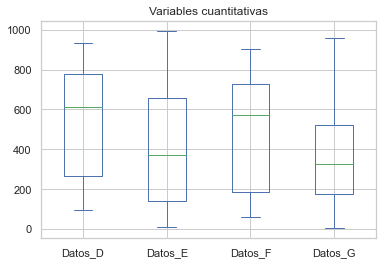

-------------- Graficas de bigotes por dicotomicas-------------------


<Figure size 720x720 with 0 Axes>

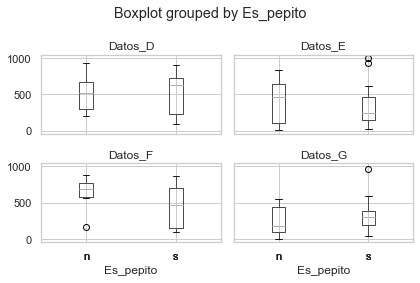

<Figure size 720x720 with 0 Axes>

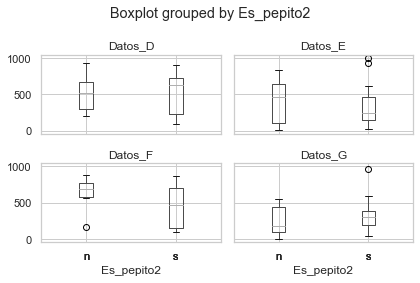

<Figure size 720x720 with 0 Axes>

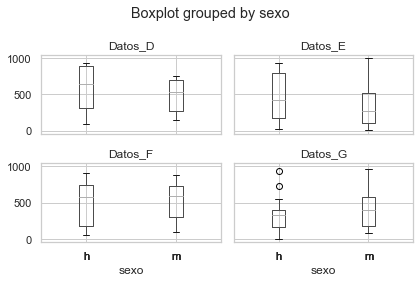

<Figure size 720x720 with 0 Axes>

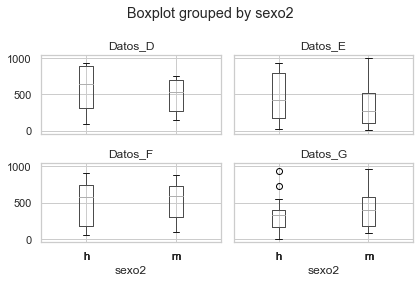



----------------------------------------------------------------------------------------------------

-------------- Graficas de bigotes por categoricas-------------------


<Figure size 720x720 with 0 Axes>

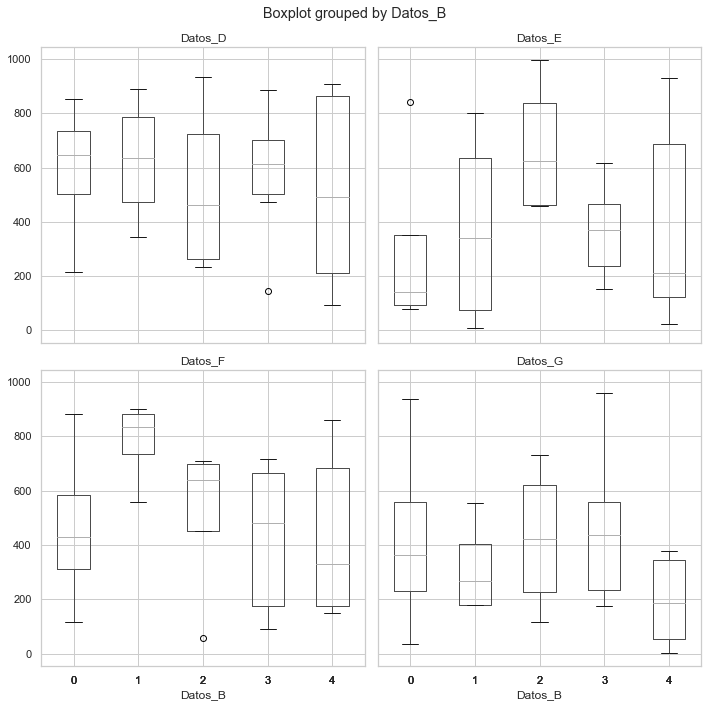

<Figure size 720x720 with 0 Axes>

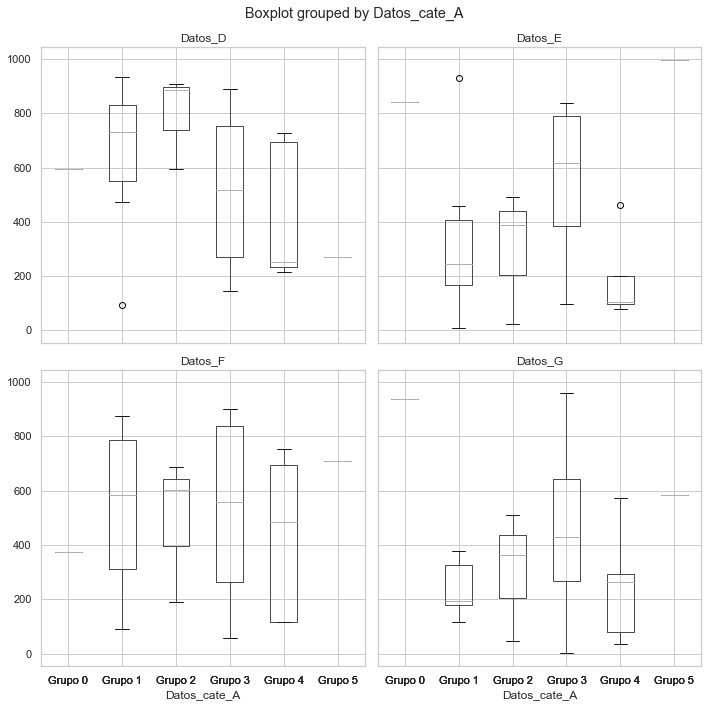

<Figure size 720x720 with 0 Axes>

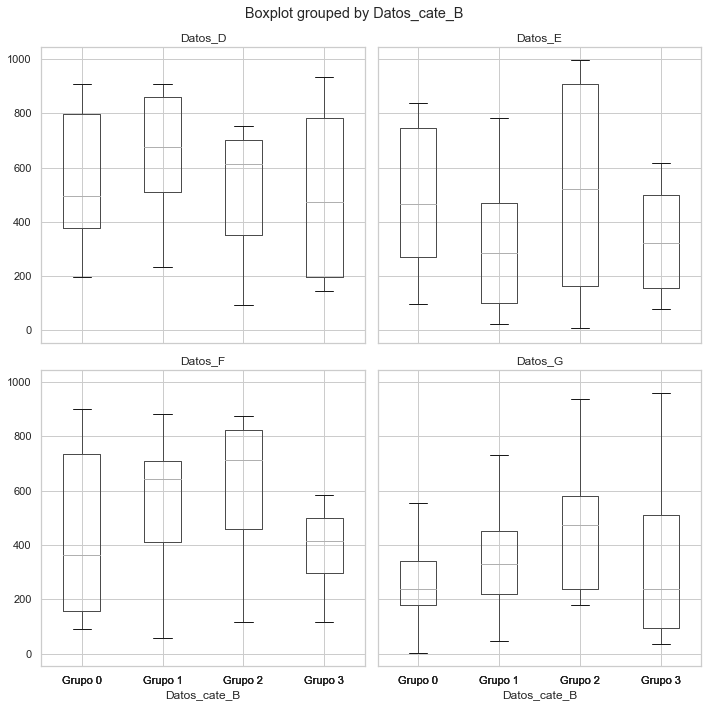

<Figure size 720x720 with 0 Axes>

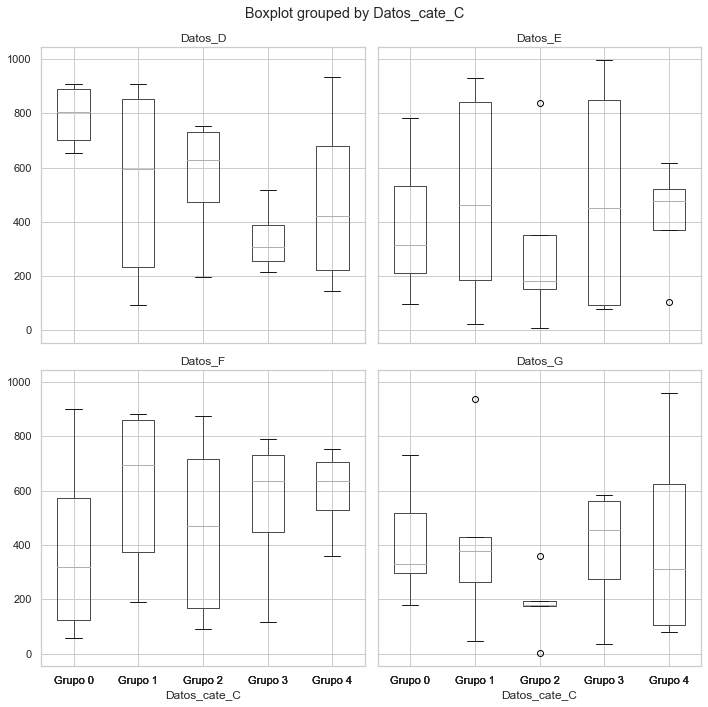



----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------



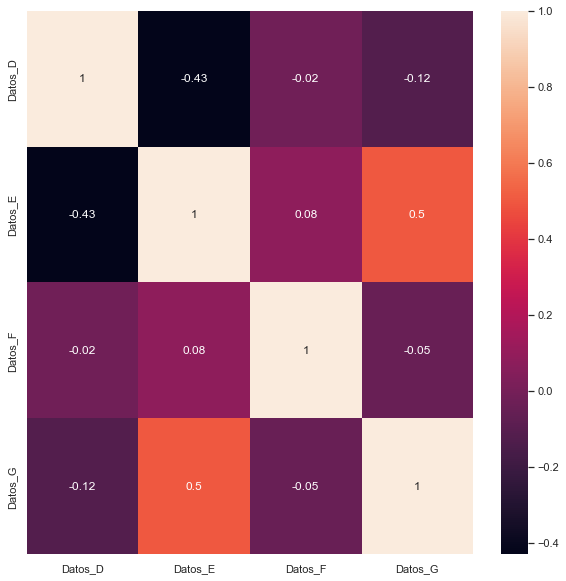

----------------------------------------------------------------------------------------------------

-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------



<Figure size 1080x1440 with 0 Axes>

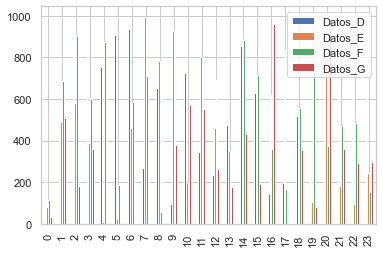

-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------


.............. GRAFICA DE BARRAS  DE Datos_D ............



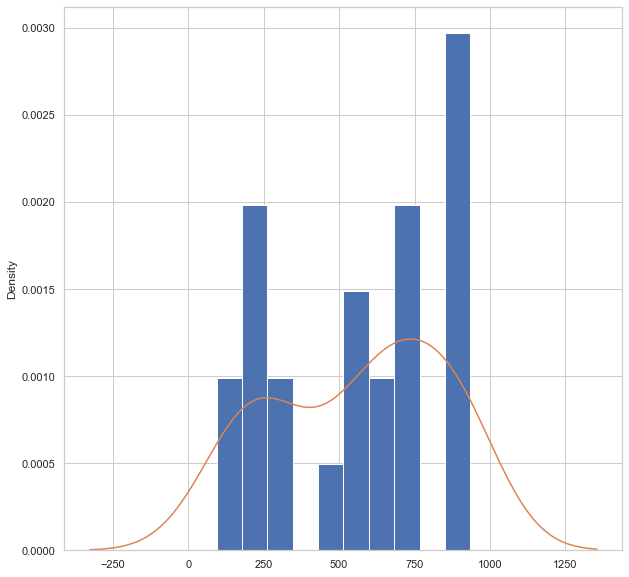


.............. GRAFICA DE BARRAS  DE Datos_E ............



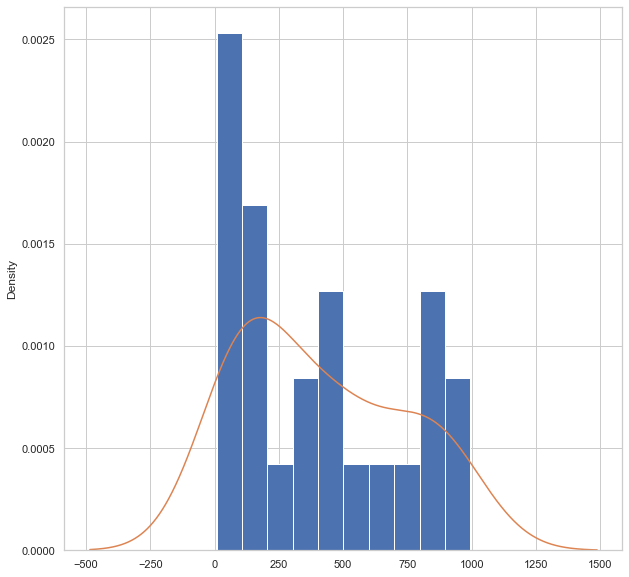


.............. GRAFICA DE BARRAS  DE Datos_F ............



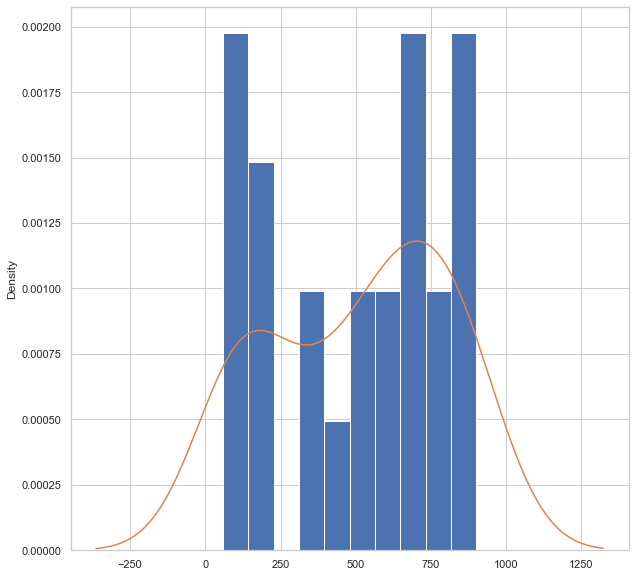


.............. GRAFICA DE BARRAS  DE Datos_G ............



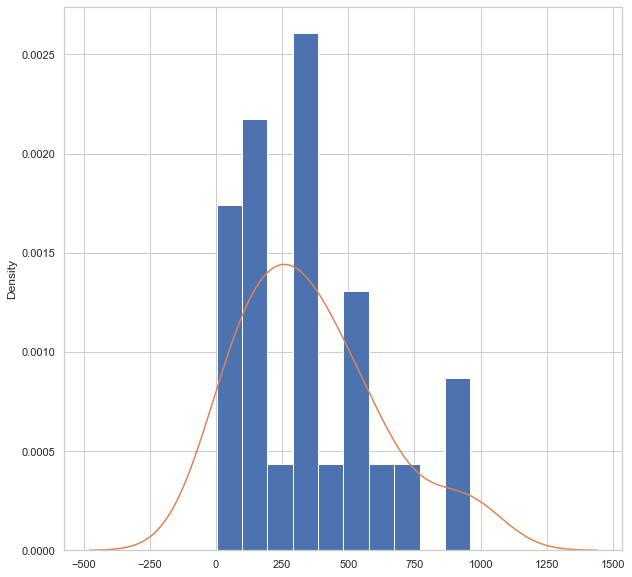

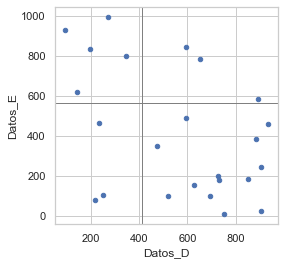

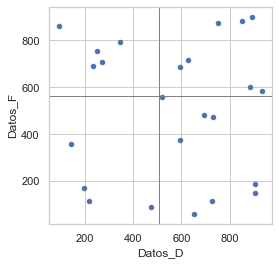


----------------------------------------------------------------------------------------------------

-------------- GRAFICA DE VIONINES  -------------------



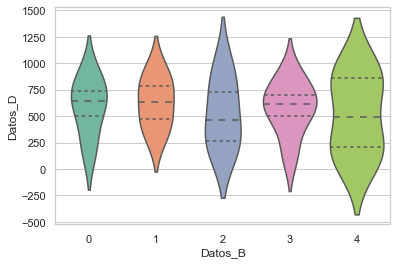

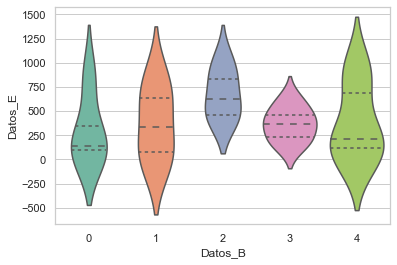

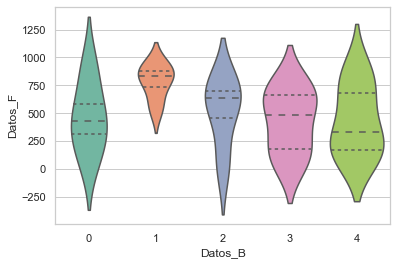

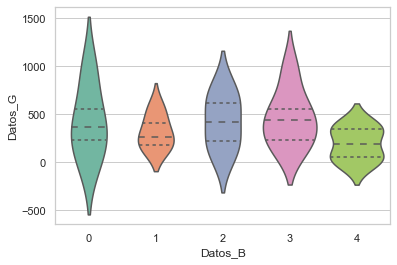

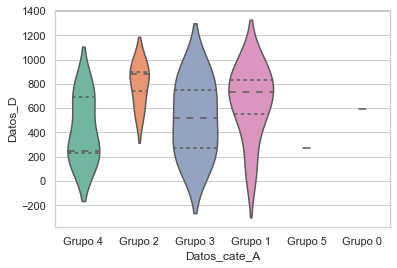

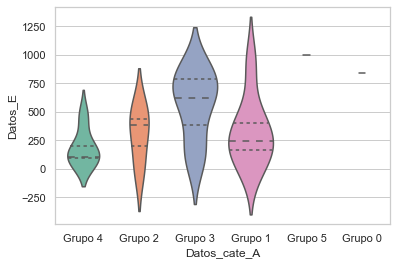

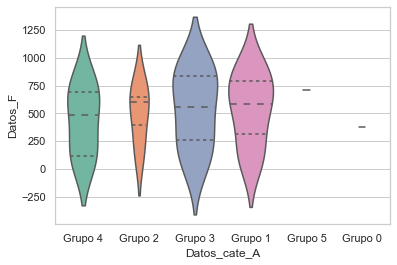

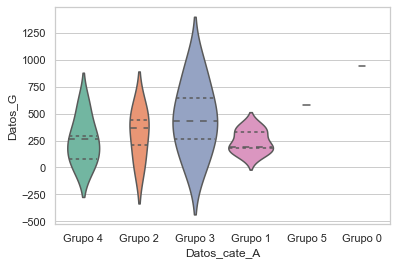

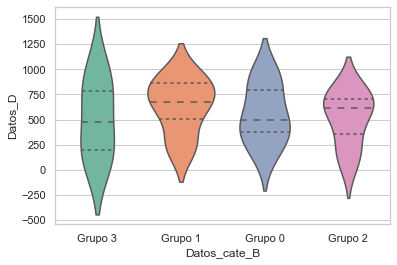

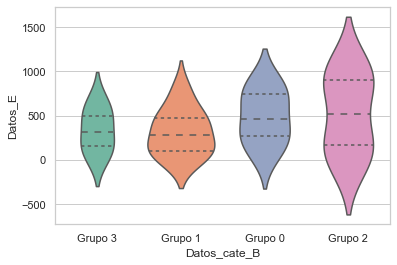

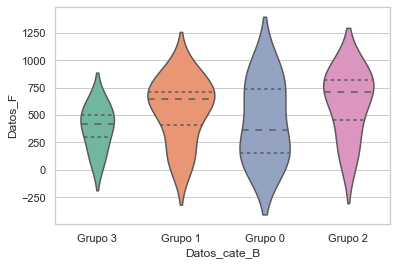

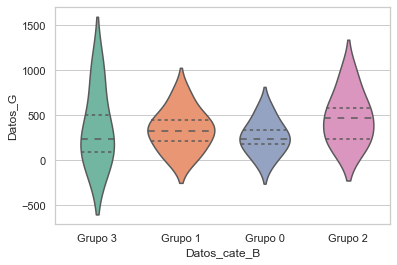

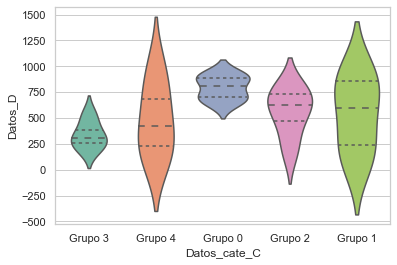

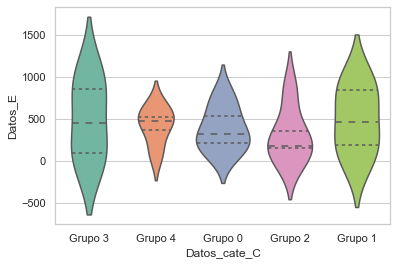

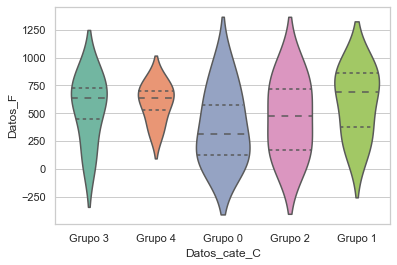

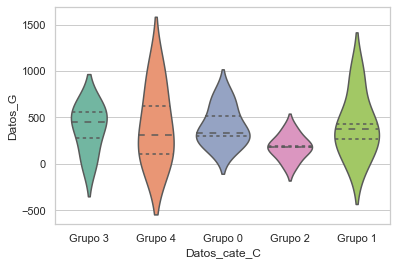


/////////-------------- GRAFICA DE VIONINES POR DICOTOMICAS -------------------/////////////



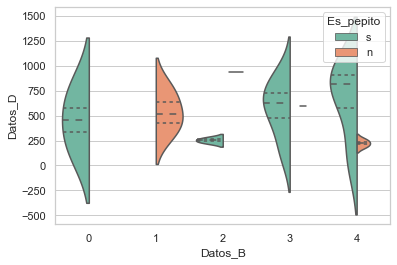

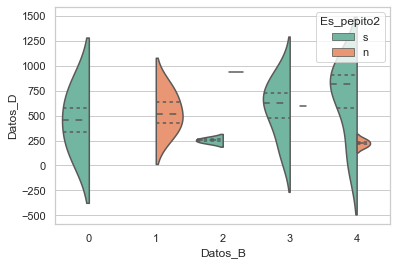

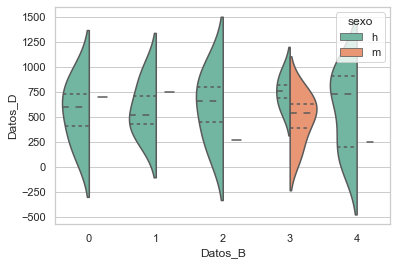

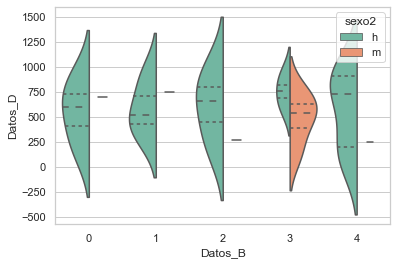

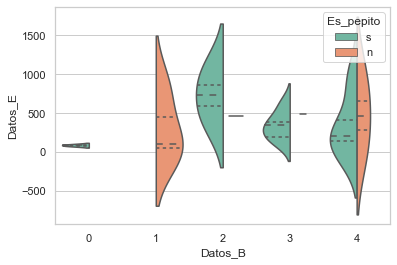

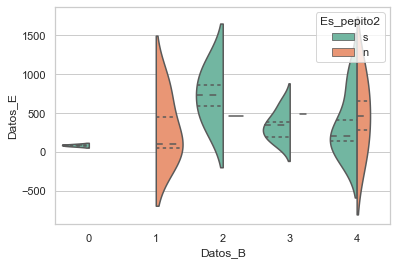

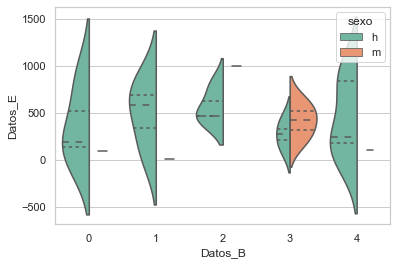

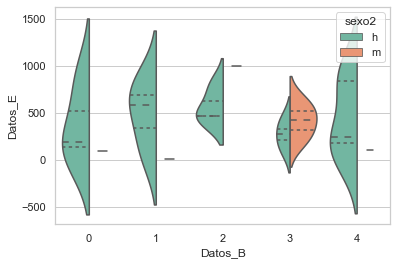

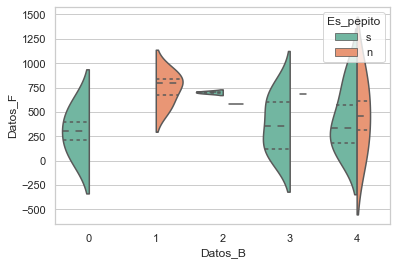

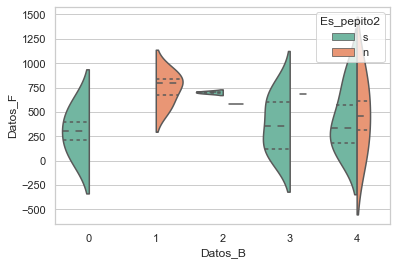

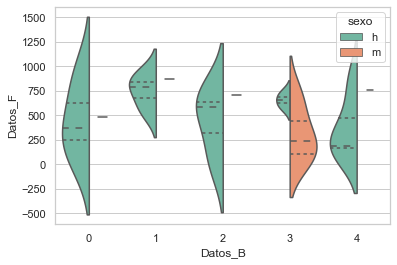

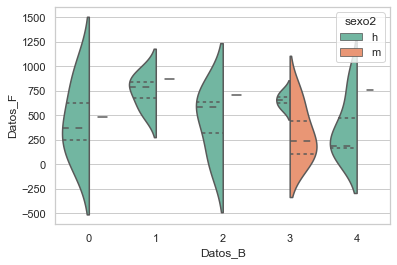

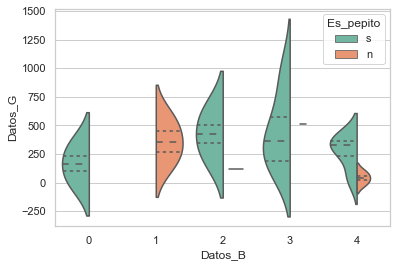

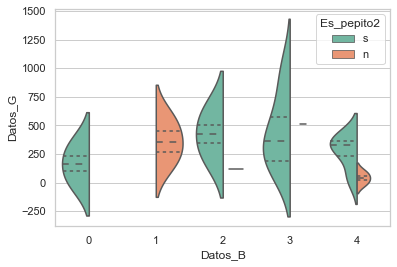

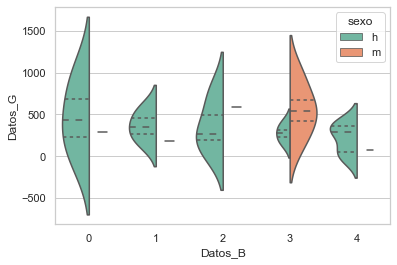

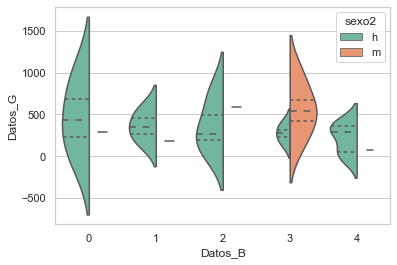

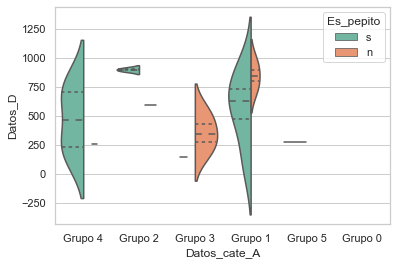

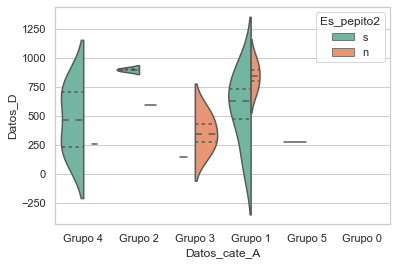

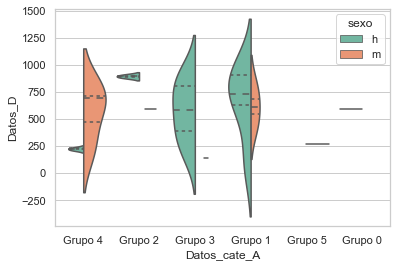

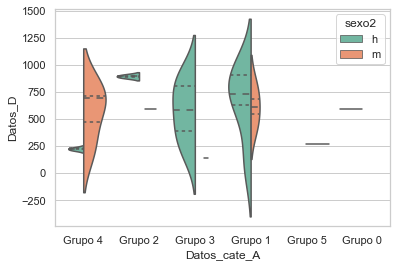

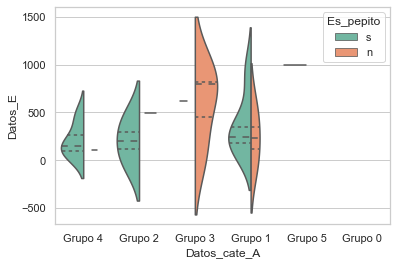

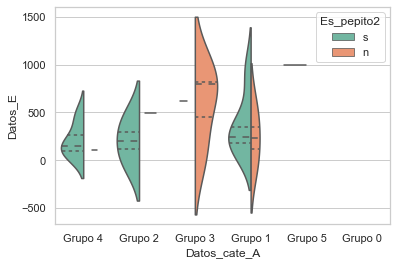

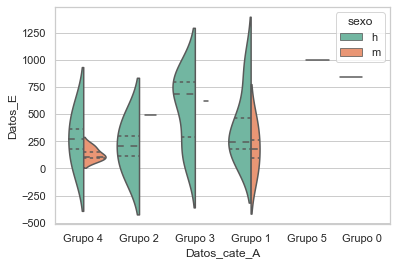

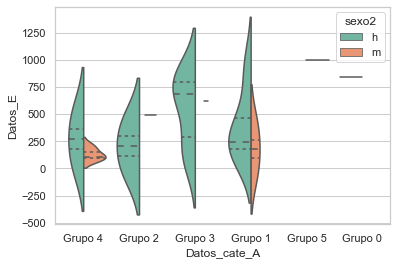

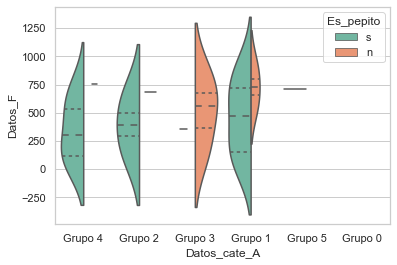

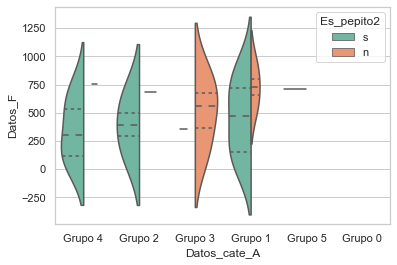

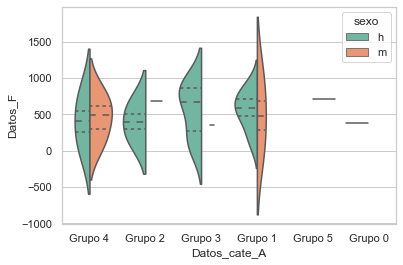

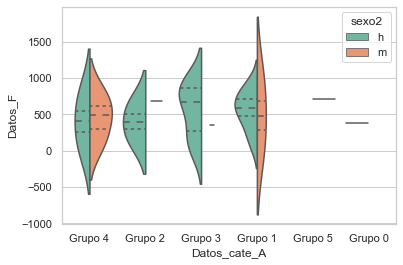

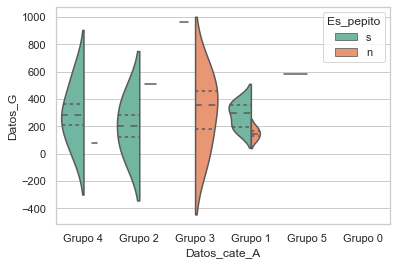

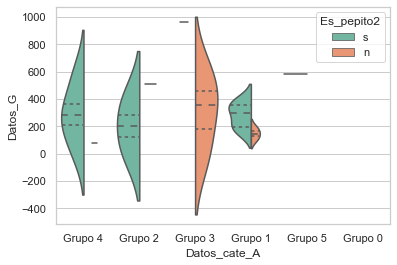

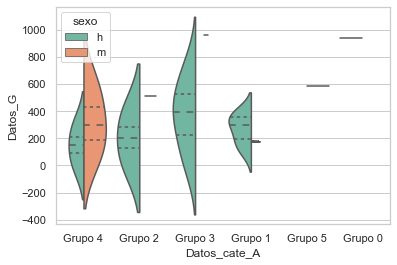

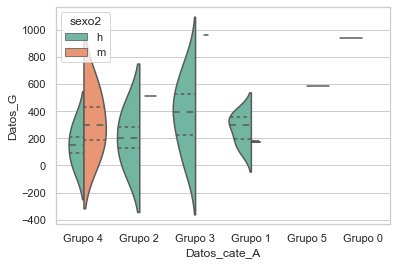

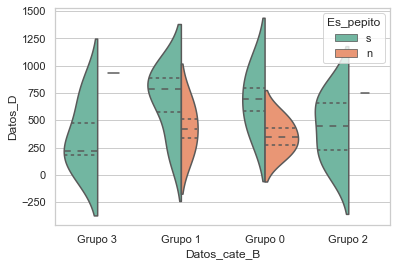

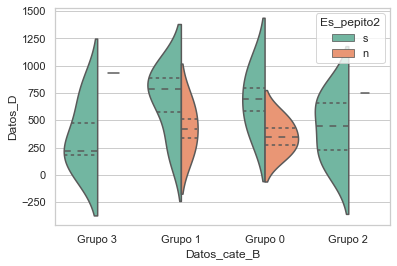

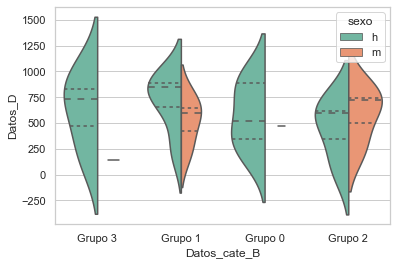

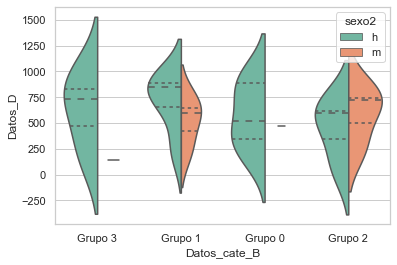

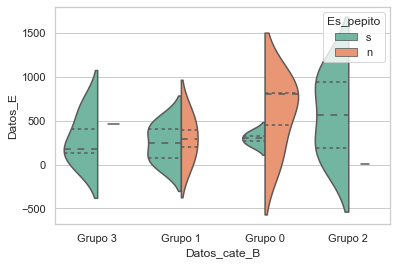

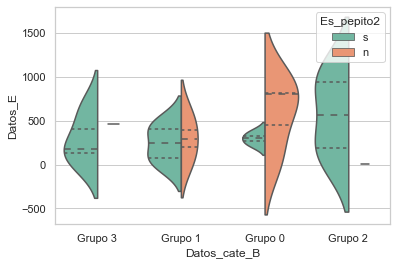

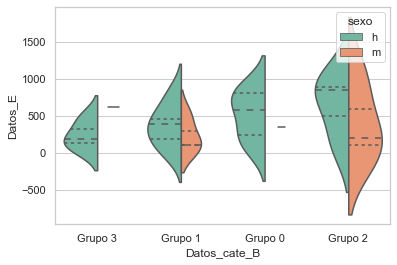

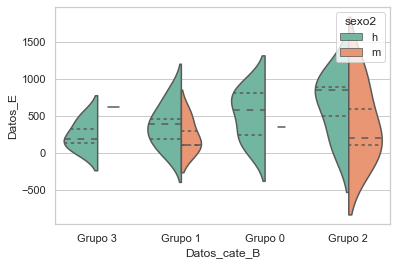

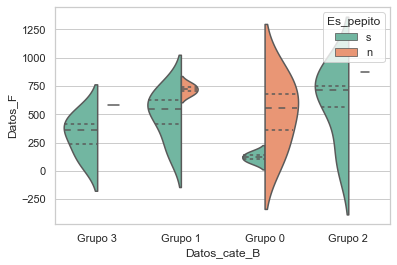

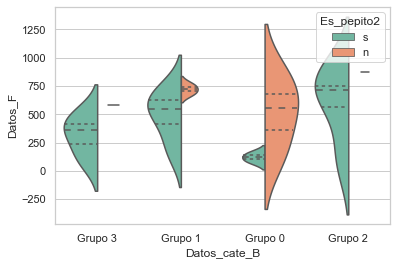

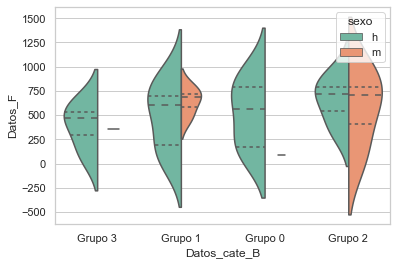

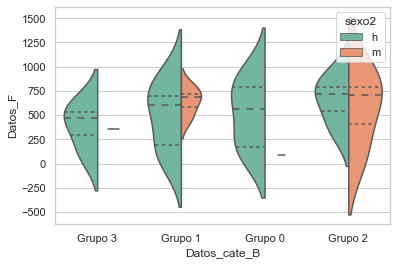

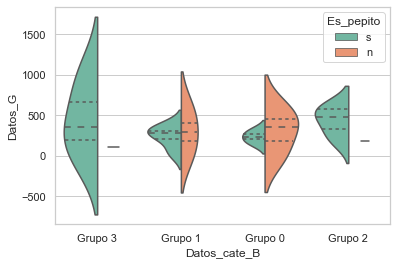

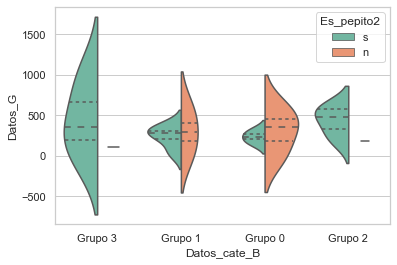

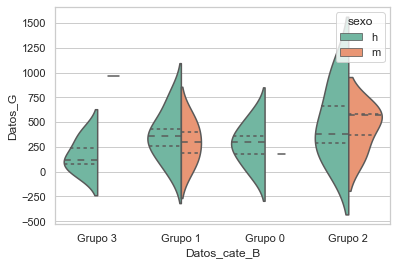

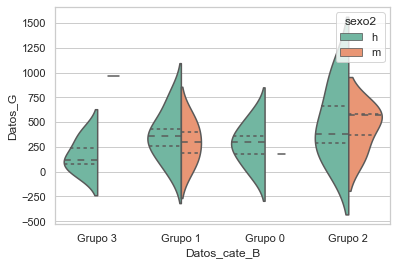

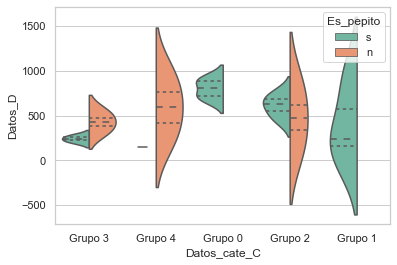

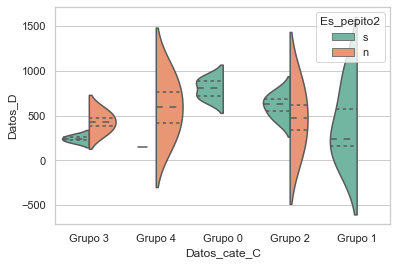

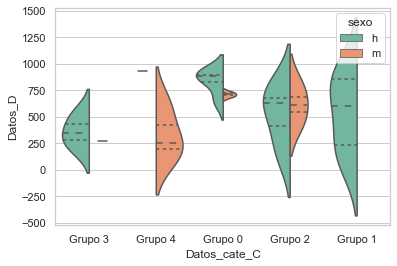

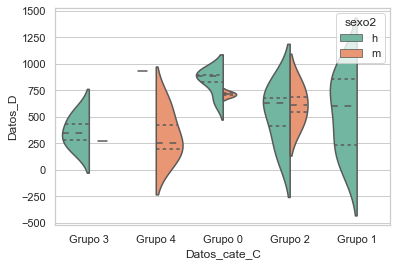

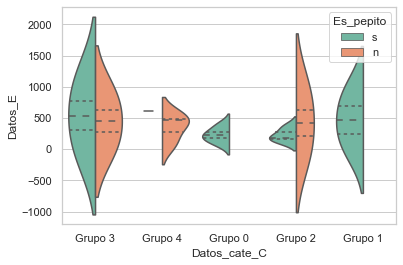

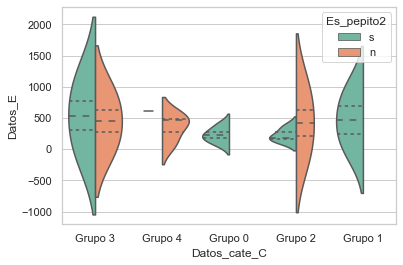

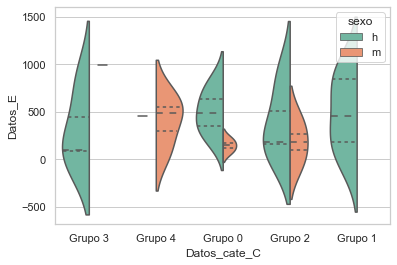

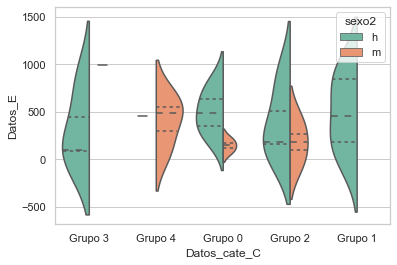

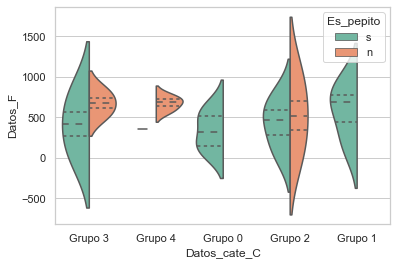

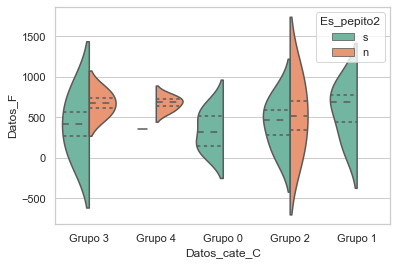

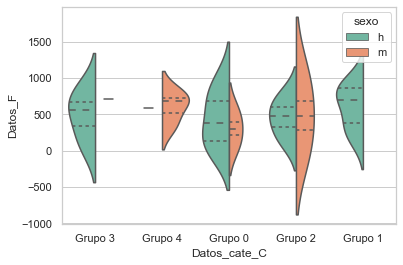

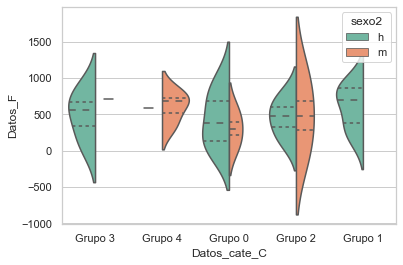

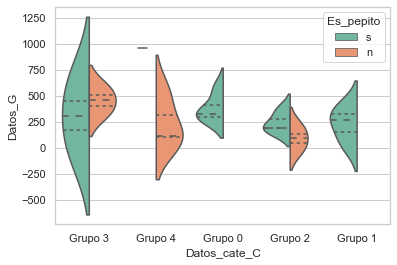

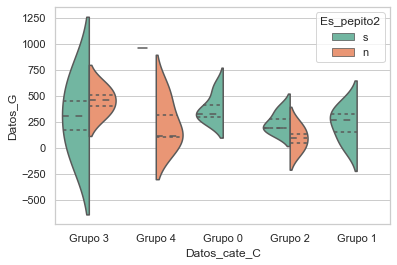

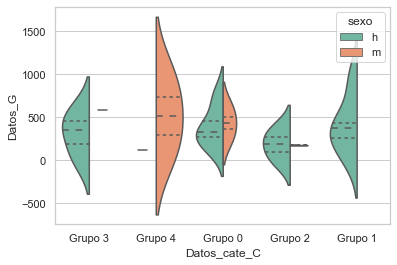

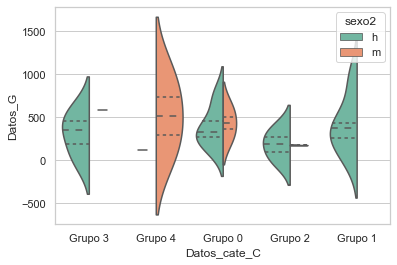

In [102]:
ejemplo.plots()

In [103]:
df_prueba.pivot(columns=['Datos_cate_C'],values='Datos_D')['Grupo 2']

0       NaN
1       NaN
2       NaN
3       NaN
4     752.0
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13    474.0
14      NaN
15    629.0
16      NaN
17    197.0
18      NaN
19      NaN
20      NaN
21    732.0
22      NaN
23      NaN
Name: Grupo 2, dtype: float64

In [104]:
ejemplo.anova()


----------- ANOVA Categoria Datos_B y variable continua Datos_D ----------

                sum_sq    df         F   PR(>F)
Datos_B   1.930013e+04   1.0  0.239502  0.62941
Residual  1.772856e+06  22.0       NaN      NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_E ----------

                sum_sq    df         F    PR(>F)
Datos_B   4.221778e+03   1.0  0.040341  0.842661
Residual  2.302354e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_F ----------

                sum_sq    df         F   PR(>F)
Datos_B   9.341262e+04   1.0  1.116352  0.30217
Residual  1.840887e+06  22.0       NaN      NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_G ----------

                sum_sq    df         F    PR(>F)
Datos_B   6.094475e+04   1.0  0.865546  0.362289
Residual  1.549063e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_cate_A y variable continua Datos_D ----------

                    sum_sq  

In [105]:
ejemplo.Chi()


-------------- Chi2 entre Es_pepito y Es_pepito2 ----------------
p: 7.744216431044088e-06 


-------------- Chi2 entre Es_pepito y sexo ----------------
p: 0.8482202494907526 


-------------- Chi2 entre Es_pepito y sexo2 ----------------
p: 0.8482202494907526 


-------------- Chi2 entre Es_pepito2 y sexo ----------------
p: 0.8482202494907526 


-------------- Chi2 entre Es_pepito2 y sexo2 ----------------
p: 0.8482202494907526 


-------------- Chi2 entre sexo y sexo2 ----------------
p: 9.63357008643095e-07 

******************** No suficientes argumentos ********************


In [106]:
ejemplo.dico

,Es_pepito,Es_pepito2,sexo,sexo2
0,s,s,h,h
1,n,n,m,m
2,None,None,h,h
3,s,s,h,h
4,n,n,m,m
5,s,s,h,h
6,n,n,h,h
7,s,s,m,m
8,None,None,h,h
9,s,s,h,h
